In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("conversiones.csv")

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [91]:
countries = df[['country', 'total_pages_visited', 'converted']].groupby('country').mean().copy()
countries

,total_pages_visited,converted
country,,
China,4.553523,0.001332
Germany,5.190717,0.062500
UK,5.082167,0.052632
US,4.930160,0.037801


In [92]:
countries['converted_visited_ratio'] = countries['converted']/countries['total_pages_visited']
countries

,total_pages_visited,converted,converted_visited_ratio
country,,,
China,4.553523,0.001332,0.000292
Germany,5.190717,0.062500,0.012041
UK,5.082167,0.052632,0.010356
US,4.930160,0.037801,0.007667


In [93]:
# Germany seems to have more conversions per view
# China seems to have the worst ratio
best_country = df[df['country'] == 'Germany'].copy()
worst_country = df[df['country'] == 'China'].copy()
best_country.head()

,country,age,new_user,source,total_pages_visited,converted
28,Germany,17,0,Seo,1,0
57,Germany,34,1,Ads,9,0
86,Germany,32,1,Direct,2,0
92,Germany,19,1,Direct,5,0
93,Germany,34,0,Seo,4,0


<BarContainer object of 4 artists>

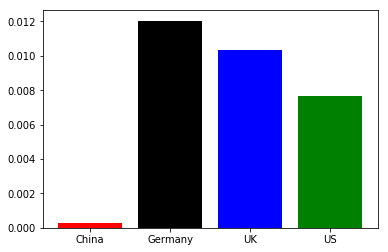

In [94]:
converted_ratio = countries[['converted_visited_ratio']]
plt.bar(converted_ratio.index, converted_ratio.converted_visited_ratio, color=['red', 'black', 'blue', 'green'])

In [95]:
best_country[['source', 'converted', 'total_pages_visited']].groupby('source').sum()

,converted,total_pages_visited
source,,
Ads,251,19671
Direct,153,14646
Seo,412,33453


In [96]:
# Now let's compare that with china's
# China has more visits per page but less conversion rate
worst_country[['source', 'converted', 'total_pages_visited']].groupby('source').sum()

,converted,total_pages_visited
source,,
Ads,32,98400
Direct,24,79060
Seo,46,171349


In [97]:
worst_country['age'].mean()

30.672971985065665

In [98]:
best_country['age'].mean()

30.44998468137255

In [99]:
worst_country['new_user'].sum()

53508

In [100]:
best_country['new_user'].sum()

8842

In [101]:
print("Number of users in germany:", best_country.shape[0])

Number of users in germany: 13056


In [102]:
print("Number of users in china:", worst_country.shape[0])

Number of users in china: 76602


## Now let's check users and new users 

In [76]:
new_users = df[df['new_user'] == 1].copy()
old_users = df[df['new_user'] == 0].copy()

In [77]:
new_users['converted'].sum()

3039

In [78]:
old_users['converted'].sum()

7161

### Old users are more likely to convert

In [86]:
old_convertion_by_source = old_users.groupby('source').sum()['converted']
old_convertion_by_source

source
Ads       2185
Direct    1387
Seo       3589
Name: converted, dtype: int64

<BarContainer object of 3 artists>

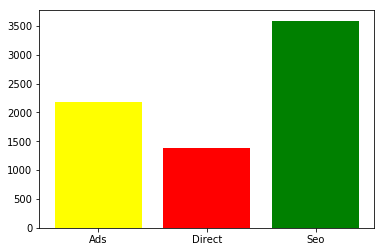

In [88]:
plt.bar(old_convertion_by_source.index, old_convertion_by_source, color=['yellow', 'red', 'green'])

In [89]:
new_convertion_by_source = new_users.groupby('source').sum()['converted']
new_convertion_by_source

source
Ads        875
Direct     653
Seo       1511
Name: converted, dtype: int64

<BarContainer object of 3 artists>

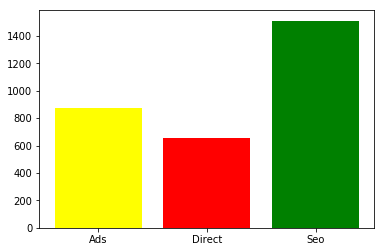

In [90]:
plt.bar(new_convertion_by_source.index, new_convertion_by_source, color=['yellow', 'red', 'green'])

##### SEO seems to have the most impact in both new and old users